#For the “ CIFAR10 small image classification ” from the Keras library, propose and implement the spliting of these data for training data and test data,

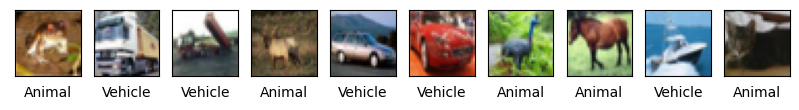

In [1]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np

# method, which selects output data between two classes (vehicle, animal)
def data_selection(y_data):
  counter = 0
  iterations = len(y_data)

  # 0 - airplane
  # 1 - automobile
  # 2 - bird
  # 3 - cat
  # 4 - deer
  # 5 - dog
  # 6 - frog
  # 7 - horse
  # 8 - ship
  # 9 - truck

  for i in range(iterations):
    if y_data[i] == 0 or y_data[i] == 1 or y_data[i] == 8  or y_data[i] == 9: # vehicle
      y_data[i] = 0
      counter+=1
    elif  y_data[i] == 2 or y_data[i] == 3 or y_data[i] == 4  or y_data[i] == 5  or y_data[i] == 6 or y_data[i] == 7: # animal
      y_data[i] = 1
      counter+=1

# load and split data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize X_train and X_test
X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ['Vehicle', 'Animal']

# performs data selection for y_train and y_test
data_selection(y_train)
data_selection(y_test)

# displays images with suitable class name
plt.figure(figsize = (10,10))

images_quantity = 10
for i in range(images_quantity):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])

plt.show()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Learn  the network to recognize only animals and vehicles (no detailed distinction - only two classes



In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_train, y_train))
model.save('test_model{}_fit.h5'.format(1))

Epoch 1/4
782/782 [==============================] - 15s 19ms/step - loss: 0.3441 - accuracy: 0.8552 - val_loss: 0.2754 - val_accuracy: 0.8858
Epoch 2/4
782/782 [==============================] - 16s 21ms/step - loss: 0.2605 - accuracy: 0.8977 - val_loss: 0.2516 - val_accuracy: 0.8998
Epoch 3/4
782/782 [==============================] - 16s 20ms/step - loss: 0.2420 - accuracy: 0.9033 - val_loss: 0.4822 - val_accuracy: 0.8058
Epoch 4/4
782/782 [==============================] - 14s 19ms/step - loss: 0.2306 - accuracy: 0.9091 - val_loss: 0.2602 - val_accuracy: 0.8926


In [3]:
from tensorflow import keras
model = keras.models.load_model('test_model{}_fit.h5'.format(1))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.8926200270652771
loss: 0.2601788341999054


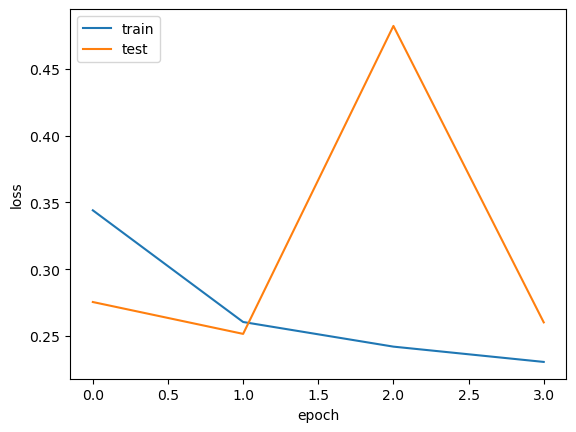

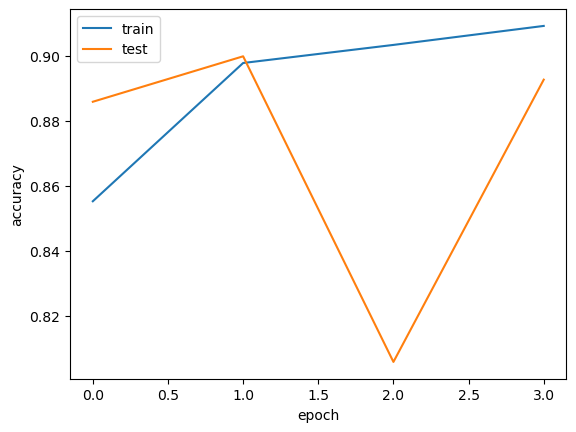

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Suggest a classifier with one, two and three convolution layers,

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# model with one convolution layer
# activation functions: relu
model_one = Sequential()
model_one.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_one.add(MaxPooling2D((2, 2)))
model_one.add(Flatten())
model_one.add(Dense(2, activation = 'softmax'))

model_one.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_one.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_train, y_train))
model_one.save('models_model{}_fit.h5'.format(1))

# model with two convolution layers
# activation functions: relu, tanh
model_two = Sequential()
model_two.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Conv2D(64, (3, 3), activation='tanh'))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Flatten())
model_two.add(Dense(2, activation = 'softmax'))

model_two.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_two.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_train, y_train))
model_two.save('models_model{}_fit.h5'.format(2))

# model with three convolution layers
# activation functions: relu, tanh, sigmoid
model_three = Sequential()
model_three.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(64, (3, 3), activation='tanh'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(128, (3, 3), activation='sigmoid'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Flatten())
model_three.add(Dense(2, activation = 'softmax'))

model_three.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_three.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_train, y_train))
model_three.save('models_model{}_fit.h5'.format(3))

Epoch 1/3
782/782 [==============================] - 16s 20ms/step - loss: 0.3431 - accuracy: 0.8554 - val_loss: 0.3580 - val_accuracy: 0.8450
Epoch 2/3
 36/782 [>.............................] - ETA: 10s - loss: 0.2818 - accuracy: 0.8859

#Compare the results from the previous point and suggest the optimal classifier for the given problem.

In [ ]:
from tensorflow import keras

# model with one convolution layer
model_one = keras.models.load_model('models_model{}_fit.h5'.format(1))
loss, acc = model_one.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 1')
plt.show()

In [ ]:
from tensorflow import keras

# model with two convolution layers
model_two = keras.models.load_model('models_model{}_fit.h5'.format(2))
loss, acc = model_two.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 2')
plt.show()

In [ ]:
from tensorflow import keras

# model with two convolution layers
model_three = keras.models.load_model('models_model{}_fit.h5'.format(3))
loss, acc = model_three.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 3')
plt.show()